# Polars Tutorial Part 2

https://www.youtube.com/watch?v=U2WnK0i_rOU&list=PLo9Vi5B84_dfAuwJqNYG4XhZMrGTF3sBx&index=3

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import polars as pl
import pandas as pd
import pyarrow
import seaborn as sns

In [3]:
data_file = "/Users/alex/.cache/kagglehub/datasets/mkechinov/ecommerce-behavior-data-from-multi-category-store/versions/8/2019-Nov.csv"
df = pl.read_csv(data_file)
    

# How to update columns and intro to window functions

In [4]:
df.head()

event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
str,str,i64,i64,str,str,f64,i64,str
"""2019-11-01 00:00:00 UTC""","""view""",1003461,2053013555631882655,"""electronics.smartphone""","""xiaomi""",489.07,520088904,"""4d3b30da-a5e4-49df-b1a8-ba5943…"
"""2019-11-01 00:00:00 UTC""","""view""",5000088,2053013566100866035,"""appliances.sewing_machine""","""janome""",293.65,530496790,"""8e5f4f83-366c-4f70-860e-ca7417…"
"""2019-11-01 00:00:01 UTC""","""view""",17302664,2053013553853497655,null,"""creed""",28.31,561587266,"""755422e7-9040-477b-9bd2-6a6e8f…"
"""2019-11-01 00:00:01 UTC""","""view""",3601530,2053013563810775923,"""appliances.kitchen.washer""","""lg""",712.87,518085591,"""3bfb58cd-7892-48cc-8020-2f17e6…"
"""2019-11-01 00:00:01 UTC""","""view""",1004775,2053013555631882655,"""electronics.smartphone""","""xiaomi""",183.27,558856683,"""313628f1-68b8-460d-84f6-cec7a8…"


### 1. update values on one or multiple columns

In [7]:
# update a string column
df_top.with_columns(
    ("brand-" + pl.col("brand")).alias("brand2")
).head()

event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,brand2
str,str,i64,i64,str,str,f64,i64,str,str
"""2019-11-01 00:00:00 UTC""","""view""",1003461,2053013555631882655,"""electronics.smartphone""","""xiaomi""",489.07,520088904,"""4d3b30da-a5e4-49df-b1a8-ba5943…","""brand-xiaomi"""
"""2019-11-01 00:00:00 UTC""","""view""",5000088,2053013566100866035,"""appliances.sewing_machine""","""janome""",293.65,530496790,"""8e5f4f83-366c-4f70-860e-ca7417…","""brand-janome"""
"""2019-11-01 00:00:01 UTC""","""view""",17302664,2053013553853497655,null,"""creed""",28.31,561587266,"""755422e7-9040-477b-9bd2-6a6e8f…","""brand-creed"""
"""2019-11-01 00:00:01 UTC""","""view""",3601530,2053013563810775923,"""appliances.kitchen.washer""","""lg""",712.87,518085591,"""3bfb58cd-7892-48cc-8020-2f17e6…","""brand-lg"""
"""2019-11-01 00:00:01 UTC""","""view""",1004775,2053013555631882655,"""electronics.smartphone""","""xiaomi""",183.27,558856683,"""313628f1-68b8-460d-84f6-cec7a8…","""brand-xiaomi"""


In [14]:
# update a string column
df.with_columns(
    ("brand-" + pl.col("brand")).alias("brand2"),
    (pl.col("price") * 100).alias("price2"),
).head()

event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,brand2,price2
str,str,i64,i64,str,str,f64,i64,str,str,f64
"""2019-11-01 00:00:00 UTC""","""view""",1003461,2053013555631882655,"""electronics.smartphone""","""xiaomi""",489.07,520088904,"""4d3b30da-a5e4-49df-b1a8-ba5943…","""brand-xiaomi""",48907.0
"""2019-11-01 00:00:00 UTC""","""view""",5000088,2053013566100866035,"""appliances.sewing_machine""","""janome""",293.65,530496790,"""8e5f4f83-366c-4f70-860e-ca7417…","""brand-janome""",29365.0
"""2019-11-01 00:00:01 UTC""","""view""",17302664,2053013553853497655,null,"""creed""",28.31,561587266,"""755422e7-9040-477b-9bd2-6a6e8f…","""brand-creed""",2831.0
"""2019-11-01 00:00:01 UTC""","""view""",3601530,2053013563810775923,"""appliances.kitchen.washer""","""lg""",712.87,518085591,"""3bfb58cd-7892-48cc-8020-2f17e6…","""brand-lg""",71287.0
"""2019-11-01 00:00:01 UTC""","""view""",1004775,2053013555631882655,"""electronics.smartphone""","""xiaomi""",183.27,558856683,"""313628f1-68b8-460d-84f6-cec7a8…","""brand-xiaomi""",18327.0


In [21]:
# create a column with a constant (based on the mean in this case)
df.with_columns([
    pl.col("price").mean().alias("price_avg")
]).head()

event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,price_avg
str,str,i64,i64,str,str,f64,i64,str,f64
"""2019-11-01 00:00:00 UTC""","""view""",1003461,2053013555631882655,"""electronics.smartphone""","""xiaomi""",489.07,520088904,"""4d3b30da-a5e4-49df-b1a8-ba5943…",292.459317
"""2019-11-01 00:00:00 UTC""","""view""",5000088,2053013566100866035,"""appliances.sewing_machine""","""janome""",293.65,530496790,"""8e5f4f83-366c-4f70-860e-ca7417…",292.459317
"""2019-11-01 00:00:01 UTC""","""view""",17302664,2053013553853497655,null,"""creed""",28.31,561587266,"""755422e7-9040-477b-9bd2-6a6e8f…",292.459317
"""2019-11-01 00:00:01 UTC""","""view""",3601530,2053013563810775923,"""appliances.kitchen.washer""","""lg""",712.87,518085591,"""3bfb58cd-7892-48cc-8020-2f17e6…",292.459317
"""2019-11-01 00:00:01 UTC""","""view""",1004775,2053013555631882655,"""electronics.smartphone""","""xiaomi""",183.27,558856683,"""313628f1-68b8-460d-84f6-cec7a8…",292.459317


In [26]:
# create a column with a constant (based on the mean in this case)
df.select([
    pl.col("price"),
    pl.col("price").mean().alias("price_avg")
]).head()

price,price_avg
f64,f64
489.07,292.459317
293.65,292.459317
28.31,292.459317
712.87,292.459317
183.27,292.459317


In [25]:
# create a column with a constant (based on the mean in this case)
df.select([
    pl.all(),
    pl.col("price").mean().alias("price_avg")
]).head()

event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,price_avg
str,str,i64,i64,str,str,f64,i64,str,f64
"""2019-11-01 00:00:00 UTC""","""view""",1003461,2053013555631882655,"""electronics.smartphone""","""xiaomi""",489.07,520088904,"""4d3b30da-a5e4-49df-b1a8-ba5943…",292.459317
"""2019-11-01 00:00:00 UTC""","""view""",5000088,2053013566100866035,"""appliances.sewing_machine""","""janome""",293.65,530496790,"""8e5f4f83-366c-4f70-860e-ca7417…",292.459317
"""2019-11-01 00:00:01 UTC""","""view""",17302664,2053013553853497655,null,"""creed""",28.31,561587266,"""755422e7-9040-477b-9bd2-6a6e8f…",292.459317
"""2019-11-01 00:00:01 UTC""","""view""",3601530,2053013563810775923,"""appliances.kitchen.washer""","""lg""",712.87,518085591,"""3bfb58cd-7892-48cc-8020-2f17e6…",292.459317
"""2019-11-01 00:00:01 UTC""","""view""",1004775,2053013555631882655,"""electronics.smartphone""","""xiaomi""",183.27,558856683,"""313628f1-68b8-460d-84f6-cec7a8…",292.459317


### 2. Update values based on window functions

In [32]:
# equivalent to groupby category then mean

df.with_columns([
    pl.col("price")
        .mean()
        .over("category_code")
        .alias("mean_price_by_categorycode"),
    pl.col("price")
        .mean()
        .alias("mean_price")
]).head()

event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,mean_price_by_categorycode,mean_price
str,str,i64,i64,str,str,f64,i64,str,f64,f64
"""2019-11-01 00:00:00 UTC""","""view""",1003461,2053013555631882655,"""electronics.smartphone""","""xiaomi""",489.07,520088904,"""4d3b30da-a5e4-49df-b1a8-ba5943…",483.637803,292.459317
"""2019-11-01 00:00:00 UTC""","""view""",5000088,2053013566100866035,"""appliances.sewing_machine""","""janome""",293.65,530496790,"""8e5f4f83-366c-4f70-860e-ca7417…",244.516497,292.459317
"""2019-11-01 00:00:01 UTC""","""view""",17302664,2053013553853497655,null,"""creed""",28.31,561587266,"""755422e7-9040-477b-9bd2-6a6e8f…",176.64639,292.459317
"""2019-11-01 00:00:01 UTC""","""view""",3601530,2053013563810775923,"""appliances.kitchen.washer""","""lg""",712.87,518085591,"""3bfb58cd-7892-48cc-8020-2f17e6…",340.601164,292.459317
"""2019-11-01 00:00:01 UTC""","""view""",1004775,2053013555631882655,"""electronics.smartphone""","""xiaomi""",183.27,558856683,"""313628f1-68b8-460d-84f6-cec7a8…",483.637803,292.459317


In [36]:
df_cat_window = df.select([
    pl.col("category_code"),
    pl.col("price"),
    pl.col("price")
        .mean()
        .over("category_code")
        .alias("price_by_category"),
    (pl.col("price") / pl.col("price").mean().over("category_code") - 1)
        .alias("price_div_cat_avg")
])

df_cat_window.head()

category_code,price,price_by_category,price_div_cat_avg
str,f64,f64,f64
"""electronics.smartphone""",489.07,483.637803,0.011232
"""appliances.sewing_machine""",293.65,244.516497,0.200941
null,28.31,176.64639,-0.839736
"""appliances.kitchen.washer""",712.87,340.601164,1.092976
"""electronics.smartphone""",183.27,483.637803,-0.621059


In [37]:
df_cat_window_sample = df_cat_window.sample(1_000_000).to_pandas()

<Axes: >

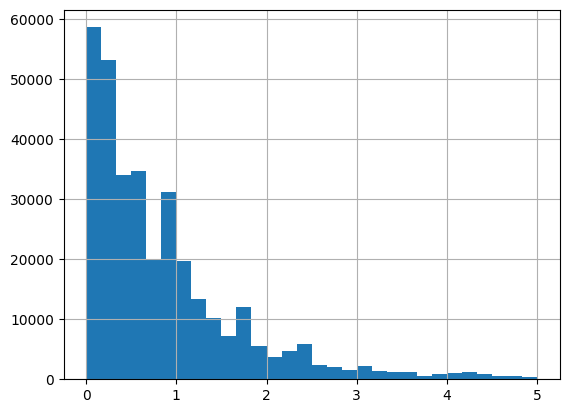

In [38]:
df_cat_window_sample.price_div_cat_avg.hist(bins=30, range=[0, 5])

<Axes: ylabel='Count'>

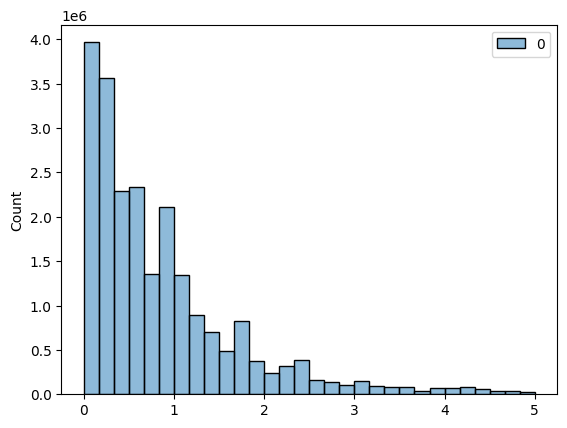

In [66]:
sns.histplot(
    df_cat_window.select(pl.col("price_div_cat_avg")),
    bins=30,
    binrange=[0, 5],
)

In [77]:
# polars only lets you take a single quantile at a time
quantiles = np.arange(0.0, 1.1, 0.1)
[
    df_cat_window.select(
        pl.col("price_div_cat_avg")
    ).quantile(x).item()

    for x in quantiles
]

[-1.0,
 -0.7999642138319095,
 -0.7056265914731873,
 -0.5967436811262199,
 -0.4791321869632966,
 -0.3348963123005333,
 -0.12489574669813719,
 0.10599486199775776,
 0.4814700212020233,
 1.0618528873391004,
 35.50223889794373]

In [79]:
# or we can bounce out to pandas and look at this
df_cat_window.select(
    pl.col("price_div_cat_avg")
).to_pandas().quantile(np.arange(0., 1.1, 0.1))

,price_div_cat_avg
0.0,-1.000000
0.1,-0.799964
0.2,-0.705627
0.3,-0.596744
0.4,-0.479132
0.5,-0.334896
0.6,-0.124896
0.7,0.105995
0.8,0.481470
0.9,1.061853
